In [20]:
import sys
!{sys.executable} -m pip install PyWavelets

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from scipy.signal import wiener  

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB 682.7 kB/s eta 0:00:07
   ---------------------------------------- 0.0/4.2 MB 495.5 kB/s eta 0:00:09
    --------------------------------------- 0.1/4.2 MB 751.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/4.2 MB 722.1 kB/s eta 0:00:06
   - -------------------------------------- 0.2/4.2 MB 807.1 kB/s eta 0:00:06
   - -------------------------------------- 0.2/4.2 MB 778.2 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/4.2 MB 689.2 kB/s eta 0:00:06
   -- ------------------------------------- 0.3/4.2 MB 684.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.3/4.2 MB 761.4 kB/s eta 0:00:06
   --- ------------------------------------ 0.4/4.2 MB 796.7 kB/s eta 0:00:05
   --- ------------------------------------ 0.4/4.2 MB 804.0 kB/s eta 0:00:05
   ---- ----------------------------------- 0.4/4.2 MB 835.1 kB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

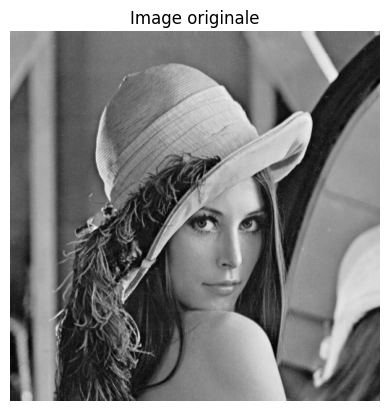

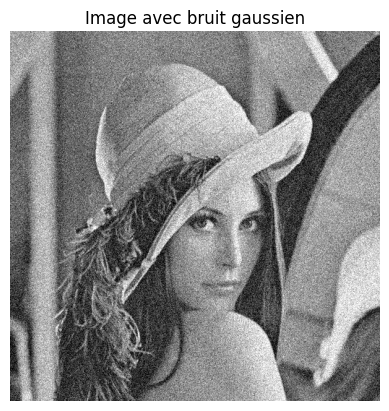

PSNR entre l'image originale et l'image bruitée :  20.084960091344648


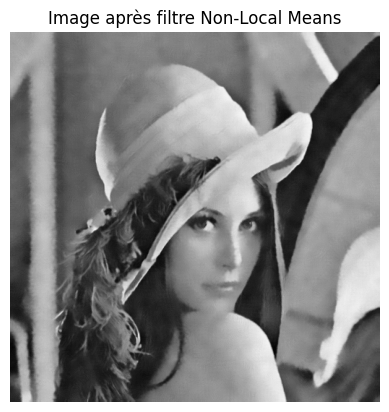

PSNR entre l'image originale et l'image débruitée :  29.62427026621559


In [ ]:

# Charger et afficher l'image originale
image = import_image("lena.pgm")
display_image(image, "Image originale")

# Normaliser l'image entre 0 et 1
image = image / 255.0

# Ajouter du bruit gaussien de variance 0.01
noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)  # S'assurer que les valeurs restent entre 0 et 1
display_image(image_noised, 'Image avec bruit gaussien')

# Calculer le PSNR entre l'image originale et l'image bruitée
psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

# Estimer l'écart-type du bruit pour ajuster le filtre NLM
sigma_est = np.mean(estimate_sigma(image_noised))

# Appliquer le filtre Non-Local Means
image_filtree = denoise_nl_means(image_noised, h=1.15 * sigma_est, fast_mode=True, 
                                 patch_size=5, patch_distance=6)

# Afficher l'image après le filtre NLM
display_image(image_filtree, "Image après filtre Non-Local Means")

# Calculer le PSNR entre l'image originale et l'image débruitée
psnr_originale_debruitee = psnr(image * 255, image_filtree * 255)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)

# Sauvegarder les résultats
ski.io.imsave("results/noised.pgm", (image_noised * 255).astype(np.uint8))
ski.io.imsave("results/denoised.pgm", (image_filtree * 255).astype(np.uint8))
